# James Griffin 
## Coding Lab 1 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sy
from sympy import symbols
from scipy import optimize
import scipy as sp 
from math import cos, sqrt, sin 

In [2]:
def descent(f,df,x0,eta=.001,N=1000,eps=1e-10):
    # gradient descent with a simple momentum
    # f is the function to be evaluated
    # df is the gradient of the function
    # x0 is the initial guess
    # m is the momentum friction term (default is m=0.9)
    # eta is the learning rate (default is eta=1e-3)
    # N is the maximal number of iterations (default is N=500)
    # eps is the error to guarantee convergence (default is eps=1e-12)
    
    #Initialize ierations 
    iterations = 0
    #store f values 
    f_vals = []
    #start x_0 at guess 
    x_old = x0
    #print(type(x_old))
    v = -eta*df(x_old) #the initial velocity 
    
    x_new = x_old+v #the first step forward
    while np.linalg.norm(x_new-x_old)>eps and iterations < N:
        #f_vals.append(np.linalg.norm(x_new-x_old))
        x_old = x_new
        x_new = x_old -eta*df(x_old)
        iterations+=1
        f_vals.append(np.linalg.norm(x_new-x_old))
    return x_new, f_vals, #x_new#, f(xnew)




## Equations from homework


##### equation 1

In [3]:
def f1(x):
    #Beale's function (note that Python indexes starting at 0, not 1)
    return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2


In [4]:
def df1(x):
    #gradient of Beale's function
    return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3), 2*x[0]*(1.5-x[0]+x[0]*x[1]) + 4*x[0]*x[1]*(2.25-x[0]+x[0]*x[1]**2) + 6*x[0]*x[1]**2*(2.625-x[0]+x[0]*x[1]**3)])


###### equation 2

In [5]:
def f2(x):
    #Himmelblau's function
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

In [6]:
def df2(x):
    #gradient of Himmelblau's function
    return np.array([4*x[0]*(x[0]**2+x[1]-11) + 2*(x[0]+x[1]**2-7), 2*(x[0]**2+x[1]-11) + 4*x[1]*(x[0]+x[1]**2-7)])

In [7]:
# find and make callable derivative helper function 
def DF(f,x):
    x_1, x_2 = symbols('x_1 x_2', real = True)
    f1 = sy.diff(f,x_1)
    f1 = sy.lambdify((x_1,x_2),f1)
    f2 = sy.diff(f,x_2)
    f2 = sy.lambdify((x_1,x_2),f2)
    
    return np.array([f1(x[0],x[1]), f2(x[0],x[1])]), np.array([f1, f2])

###### equation 3 hell yeah! 

In [8]:
def f3(x):
    return -(x[1]+47)*sin(sqrt(abs(x[0]/2 + x[1] + 47))) - x[0]*sin(sqrt(abs(x[0] - (x[1] + 47))))
    
def df3(x):
    return np.array([x[0]*cos(sqrt(abs(-x[0] + x[1] + 47)))*np.sign(-x[0] + x[1]+47)/(2*sqrt(abs(-x[0] + x[1]+47)))
              + (-x[1] - 47)*cos(sqrt(abs(x[0]/2 + x[1] + 47)))*np.sign(x[0]/2 + x[1]+47)/(4*sqrt(abs(x[0]/2 + x[1]+47)))
              - sin(sqrt(abs(-x[0] + x[1] + 47))),
              
              x[0]*cos(sqrt(abs(-x[0] + x[1] + 47)))*np.sign(-x[0] + x[1]+47)/(2*sqrt(abs(-x[0] + x[1]+47)))
              + (-x[1] - 47)*cos(sqrt(abs(x[0]/2 + x[1] + 47)))*np.sign(x[0]/2 + x[1]+47)/(2*sqrt(abs(x[0]/2 + x[1]+47)))
              - sin(sqrt(abs(x[0]/2 + x[1] + 47)))])


###### equation 4

In [9]:
x1, x2 = symbols('x1 x2', real = True)
f4 = -20*sy.exp(-0.2*sy.sqrt(0.5*(x1**2 + x2**2))) - sy.exp(0.5*(sy.cos(2*sy.pi*x1)+sy.cos(2*sy.pi*x2))) + sy.exp(1) + 20

f4p = sy.lambdify((x1,x2), f4)
#f4 = lambda x: f4p(x[0], x[1])

Df4_1 = f4.diff(x1)
Df4_2 = f4.diff(x2)

f4 = lambda x: f4p(x[0], x[1])

In [10]:
df4_lambdified = sy.lambdify((x1,x2),sy.Matrix([Df4_1, Df4_2]))
df4 = lambda x: df4_lambdified(x[0],x[1])[:,0]

##### equation 5 

In [11]:
## getting equation 5 from past notebook 
x1,x2 = sy.symbols('x1, x2', real=True) #not dealing with imaginary roots 
f_5 = sy.sin(2*sy.pi*x1)**2 + (x1 - 1)**2 * (1 + sy.sin(3*sy.pi*x2)**2) + (x2-1)**2 * (1 + sy.sin(2*sy.pi*x2)**2)
f5p = sy.lambdify((x1,x2), f_5)
f5 = lambda x: f5p(x[0], x[1])

Df1 = f_5.diff(x1)
Df2 = f_5.diff(x2)

Df5_lambdified = sy.lambdify((x1,x2),sy.Matrix([Df1, Df2]))
df5 = lambda x: Df5_lambdified(x[0],x[1])[:,0]

###### Equation 6

In [12]:
def f6(x):
    f = 0
    for k in range(5):
        f += x[k]**4 - 16*x[k]**2 + 5*x[k]
    f = f*1/2
    return f 

def df6(x):
    df = 4*x**3 - 32*x +5
    return  df 


###### equation 7 

In [13]:
def f7(x):
    f = 0
    for k in range(999):
        f += x[k]**2 - 10*np.cos(2*np.pi*x[k])
    f += 10000
    return f 


In [14]:
def df7(x):
    #df = [0]*1000
    df = 2*(x) - 20*np.pi*np.sin(2*np.pi*x)
    return  df 
    

In [15]:
def f8(x):
    #Rosenbrock's function
    f = 0
    for kk in range(999):
        f+= 100*(x[kk+1]-x[kk]**2)**2 + (1-x[kk])**2
    return f

In [16]:
def df8(x):
    #gradient of Rosenbrock's function
    df = [0]*1001
    df[1:-1] = 200*(x[1:-1]-x[0:-2]**2) - 400*x[1:-1]*(x[2:]-x[1:-1]**2) - 2*(1-x[1:-1])
    #df[k] = 200*(x[k] - x[k-1]**2) ....
    df[0] = -400*x[0]*(x[1]-x[0]**2)- 2*(1-x[0])
    df[1000] = 200*(x[1000]-x[999]**2)
    return np.array(df)

In [71]:
#gradient decent 
#q1
f1_grad_pt, f1_grad_vals = descent(f1,df1,[1,1],eta=.01,N=1000,eps=1e-12)
#q2
f2_grad_pt, f2_grad_vals = descent(f2,df2,[1,1], eta=1e-3,N=1000,eps=1e-12)
#q8 
f8_grad_pt, f8_grad_vals = descent(f8,df8,x0=np.ones(1001)*1.1,N=1000)
#q7 
f7_grad_pt, f7_grad_vals = descent(f7,df7,x0=np.random.rand(1000),N=1000)
#q6
f6_grad_pt, f6_grad_vals = descent(f6,df6,x0=np.random.rand(5),N=1000)
#q5
f5_grad_pt, f5_grad_vals = descent(f5,df5,x0=np.random.rand(2),N=1000)
#q4 
f4_grad_pt, f4_grad_vals = descent(f4,df4,x0=np.random.rand(2),N=1000)
#q3
f3_grad_pt, f3_grad_vals = descent(f3,df3,x0=np.random.rand(2),N=1000)

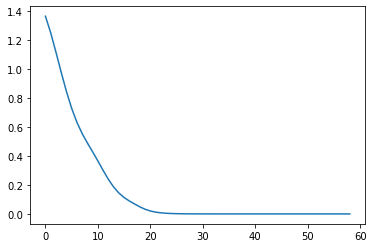

In [18]:
plt.plot(f7_grad_vals)

In [19]:
### EQUATION 16 FROM PAPER 
### NESTERHOV or whatever its called 

def nesterov(f, df, x0, m=.9, eta =.001, N=1000, eps = 1e-12):
    #starting very similarly to question 1
    iterations = 0
    f_vals = [] #empty list for f values 
    x_old = x0 #Initial guess 
    v = -eta*df(x_old)#initial velocity 
    x_new = v+x_old #includes velocity on forward step
    while np.linalg.norm(x_new -x_old)>eps and iterations < N:
        x_old = x_new
        v = v*m -eta*df(x_old+m*v)
        x_new = x_old + v#or plus m... i feel like the literature, says m but my brain says v 
        iterations += 1
        f_vals.append(np.linalg.norm(x_new - x_old))
    return x_new, f_vals


In [20]:
#calling nesterov on everything 

In [21]:
n_f1_pt, n_f1_vals = nesterov(f1, df1, np.random.rand(2), m = .9, eta=.001, N=1000,eps=1e-12)
n_f2_pt, n_f2_vals = nesterov(f2, df2, np.random.rand(2), m = .9, eta=.001, N=1000,eps=1e-12)
n_f3_pt, n_f3_vals = nesterov(f3, df3, np.random.rand(2), m = .9, eta = .001, N = 1000, eps = 1e-12)
n_f4_pt, n_f4_vals = nesterov(f4, df4, np.random.rand(2), m = .9, eta = .001, N = 1000, eps = 1e-12)
n_f5_pt, n_f5_vals = nesterov(f5, df5, np.random.rand(2), m = .9, eta = .001, N = 1000, eps = 1e-12)
n_f6_pt, n_f6_vals = nesterov(f6, df6, np.random.rand(5), m = .9, eta = .001, N = 1000, eps = 1e-12)
n_f7_pt, n_f7_vals = nesterov(f7, df7, np.random.rand(1001), m = .9, eta = .001, N = 1000, eps = 1e-12)
n_f8_pt, n_f8_vals = nesterov(f8, df8, np.random.rand(1001), m = .9, eta = .001, N = 1000, eps = 1e-12)



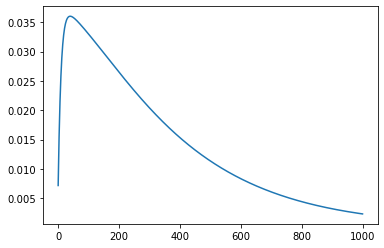

In [22]:
plt.plot(n_f3_vals)

In [23]:
def ada_grad(f, df, x0, e=1e-8, eta=1e-3, N=1000, eps = 1e-12):
    
    iterations = 0
    fs = []# = [x0]
    xold = x0
    g = df(xold)
    
    v = sqrt(sum([gi**2 for gi in g])+e)
    xnew = xold-eta*g/v
    
    while np.linalg.norm(xnew-xold) > eps and iterations < N:
        
        xold = xnew
        g = df(xold)
        v = v = sqrt(sum([gi**2 for gi in g])+e)
        xnew = xold -eta*g/v
        iterations += 1 
        fs.append(np.linalg.norm(xnew-xold))
    return xnew,  fs

In [24]:
ada_f1_point, ada_f1_vals = ada_grad(f1, df1, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
ada_f2_point, ada_f2_vals = ada_grad(f2, df2, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
ada_f3_point, ada_f3_vals = ada_grad(f3, df3, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
ada_f4_point, ada_f4_vals = ada_grad(f4, df4, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
ada_f5_point, ada_f5_vals = ada_grad(f5, df5, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
ada_f6_point, ada_f6_vals = ada_grad(f6, df6, np.random.rand(5), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
ada_f7_point, ada_f7_vals = ada_grad(f7, df7, np.random.rand(1001), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
ada_f8_point, ada_f8_vals = ada_grad(f8, df8, np.random.rand(1001), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)


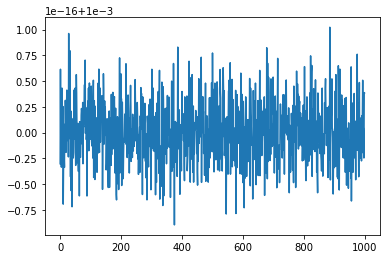

In [25]:
plt.plot(ada_f8_vals)
#boncey boncey


In [26]:
#THIS IS WRONG 

In [49]:
def adam(f,df,x0, b1=.9, b2=.999, e=.01, m=.9, eta=1e-3,  N=1000, eps = 1e-12):
    iteration = 0
    fs = []
    xold = x0
    g = df(xold)
    m = b1*np.zeros(len(x0))+(1-b1)*df(xold)
    v = np.sqrt((1-b2)*df(xold)**2)
    xnew = xold  - eta*(sqrt(1-b2))/(1-b1)*m/(v+e)
    
    while np.linalg.norm(xnew-xold)>eps and iteration < N:
        
        xold = xnew
        m = b1*m + (1-b1)*df(xold)
        v = np.sqrt((b2*v)+(1-b2)*df(xold)**2)
        #print(type(v))
        xnew =  xold - eta*((sqrt(1-b2))/(1-b1))*m/(v+e)
        iteration += 1 
        fs.append(np.linalg.norm(xnew-xold))
    return xnew, fs

In [50]:
m_f1_point, m_f1_vals = adam(f1, df1, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
m_f2_point, m_f2_vals = adam(f2, df2, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
m_f3_point, m_f3_vals = adam(f3, df3, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
m_f4_point, m_f4_vals = adam(f4, df4, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
m_f5_point, m_f5_vals = adam(f5, df5, np.random.rand(2), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
m_f6_point, m_f6_vals = adam(f6, df6, np.random.rand(5), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
m_f7_point, m_f7_vals = adam(f7, df7, np.random.rand(1001), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)
m_f8_point, m_f8_vals = adam(f8, df8, np.random.rand(1001), e=1e-8, eta=1e-3, N=1000, eps = 1e-12)

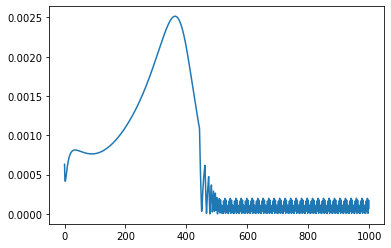

In [65]:
plt.plot(m_f4_vals)

#### Plotting convergence of functions from different optimizers  

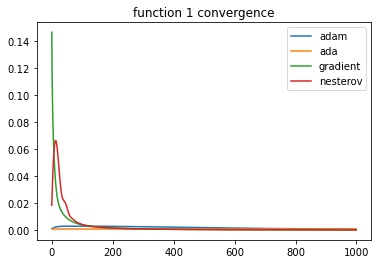

In [61]:
plt.plot(m_f1_vals, label = 'adam')
plt.plot(ada_f1_vals, label = "ada")
plt.plot(f1_grad_vals, label = 'gradient')
plt.plot(n_f1_vals, label = 'nesterov')
plt.title("function 1 convergence")
plt.legend()
plt.show()

we can clearly see that these all converge,  some with different rates, suggesting that the different methods are slightly sensitive to the initial conditions given

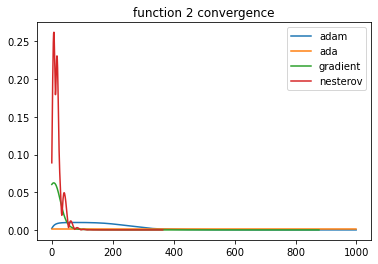

In [62]:
plt.plot(m_f2_vals, label = 'adam')
plt.plot(ada_f2_vals, label = "ada")
plt.plot(f2_grad_vals, label = 'gradient')
plt.plot(n_f2_vals, label = 'nesterov')
plt.title("function 2 convergence")
plt.legend()
plt.show()

Again, we see something similar as to question 1 and note that these were two of the ones we were able to do by hand in the previous homework. We notice some noise with Nesterov and gradient, ther eis a little bit more noise associated with the convergeence techniques 

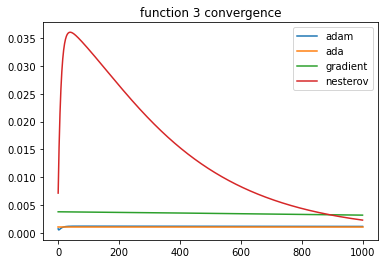

In [72]:
plt.plot(m_f3_vals, label = 'adam')
plt.plot(ada_f3_vals, label = "ada")
plt.plot(f3_grad_vals, label = 'gradient')
plt.plot(n_f3_vals, label = 'nesterov')
plt.title("function 3 convergence")
plt.legend()
plt.show()

This  also converges, but the different methods converge at different rates, and however gradient descent did not iterate long enough to get to 0, even though it was really small. It does appear to be trending downards, but is another peice of evidence that the more robust estimators converge more quickly than the OG gradient descent 

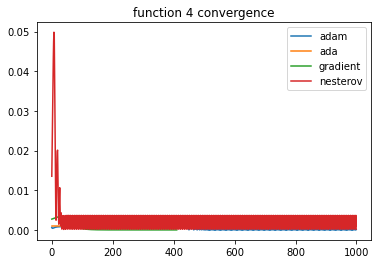

In [73]:
plt.plot(m_f4_vals, label = 'adam')
plt.plot(ada_f4_vals, label = "ada")
plt.plot(f4_grad_vals, label = 'gradient')
plt.plot(n_f4_vals, label = 'nesterov')
plt.title("function 4 convergence")
plt.legend()
plt.show()

This one does not converge, we see slight osilations in nesterrov, that are around but never quite 0, suggesting that this function does not converge uniformily, at least given the initial conditions provided.  We should probably decrease the learning rate on nesterov to see if that will help the function converge 

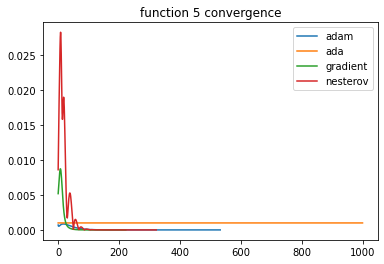

In [67]:
plt.plot(m_f5_vals, label = 'adam')
plt.plot(ada_f5_vals, label = "ada")
plt.plot(f5_grad_vals, label = 'gradient')
plt.plot(n_f5_vals, label = 'nesterov')
plt.title("function 5 convergence")
plt.legend()
plt.show()

Similar to above, agaii, all converge, this time, ada is the one that trends down slowly, but for all intensive purposes it is 0 

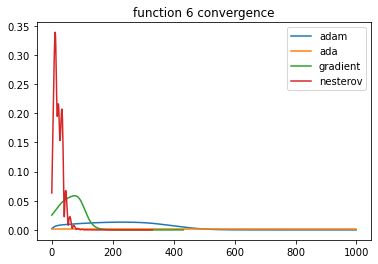

In [68]:
plt.plot(m_f6_vals, label = 'adam')
plt.plot(ada_f6_vals, label = "ada")
plt.plot(f6_grad_vals, label = 'gradient')
plt.plot(n_f6_vals, label = 'nesterov')
plt.title("function 6 convergence")
plt.legend()
plt.show()

all converge,  different rates, nesterov has the  highest varience with ada grad taking the lognest 

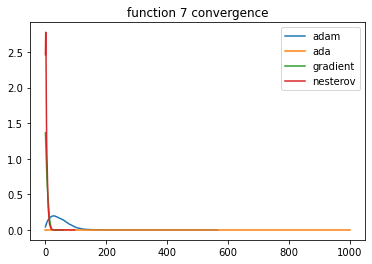

In [69]:
plt.plot(m_f7_vals, label = 'adam')
plt.plot(ada_f7_vals, label = "ada")
plt.plot(f7_grad_vals, label = 'gradient')
plt.plot(n_f7_vals, label = 'nesterov')
plt.title("function 7 convergence")
plt.legend()
plt.show()

all converge, different rates, nesterov has the highest varience with ada grad taking the lognest

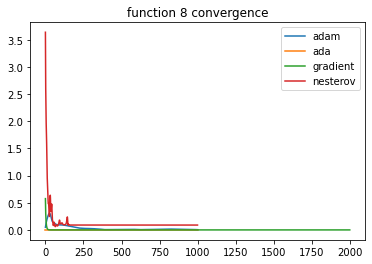

In [70]:
plt.plot(m_f8_vals, label = 'adam')
plt.plot(ada_f8_vals, label = "ada")
plt.plot(f8_grad_vals, label = 'gradient')
plt.plot(n_f8_vals, label = 'nesterov')
plt.title("function 8 convergence")
plt.legend()
plt.show()

all converge, different rates, nesterov has the highest varience with gradient grad taking the lognest

###### note 
each function was given random x0, using a numpy random.rand function, functions could have converged slighly differently if the initial point was adjusted 